<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/ML_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리

---
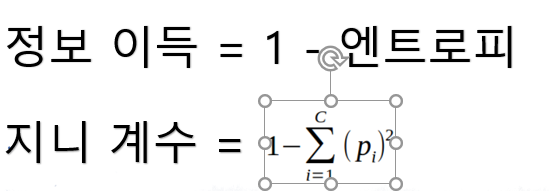


데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것\
ex) if/else 기반

---
엔트로피 = 무질서도,혼잡

정보 이득 = 엔트로피라는 개념을 기반, 서로 다른 값이 섞여있으면 엔트로피 높고 , 같은 값이 섞여 있으면 낮음  정보 이득이 높은 속성을 기준으로 분할

지니 계수 = 0이 가장 평등 1로 갈수록 불평등, ML 적용될 때 낮을수록 데이터 균일도 높은 것으로 해석 낮은 속성을 기준으로 분할

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification


In [12]:
iris = load_iris()
x_train, x_test, y_train,y_test = train_test_split(iris.data,
                                                         iris.target)


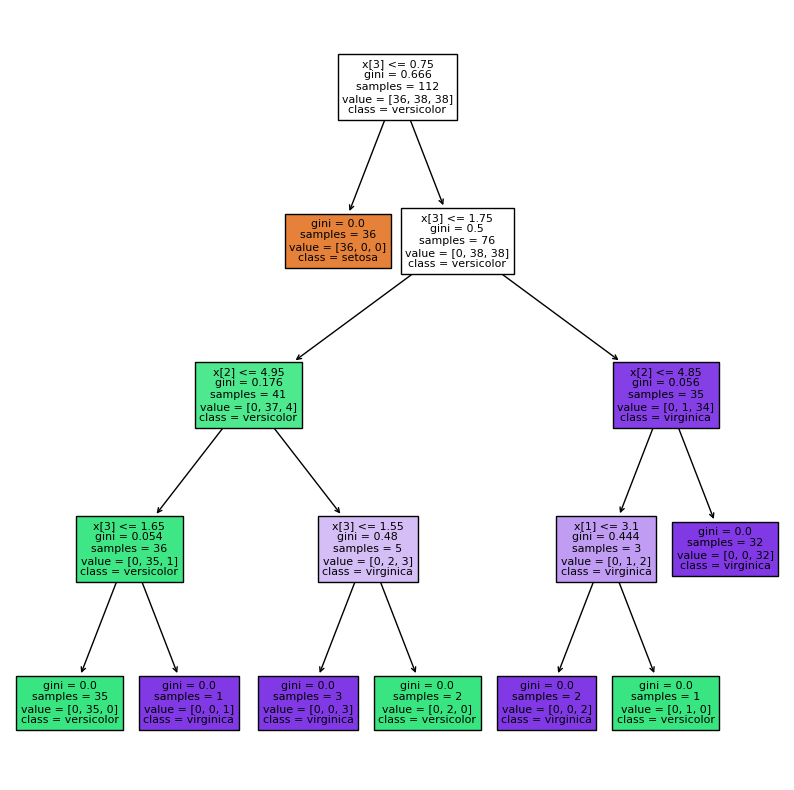


x[2] <- 자식 노드를 만들기 위한 규칙 조건

gini <- 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

samples <- 현 규칙에 해당하는 데이터 건수

value <- []는 클래스 값 기반의 데이터 건수
ex) 클레스 값 0,1,2 보유 0:Setosa 1:Versicolor 2:Virginica
[39,35,38] = Setosa 39개, Versicolor 35개, Virginica 38개 데이터로 구성



In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True,class_names=iris.target_names)
plt.show()
di='''
x[2] <- 자식 노드를 만들기 위한 규칙 조건

gini <- 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

samples <- 현 규칙에 해당하는 데이터 건수

value <- []는 클래스 값 기반의 데이터 건수
ex) 클레스 값 0,1,2 보유 0:Setosa 1:Versicolor 2:Virginica
[39,35,38] = Setosa 39개, Versicolor 35개, Virginica 38개 데이터로 구성
'''
print(di)

In [17]:
def gini2(datas):
  total=0
  for data in datas:
    total+=data
  s=0
  for data in datas:
    s+=(data/total)**2
  return 1-s

In [18]:
gini2([35,37,40])

0.665656887755102

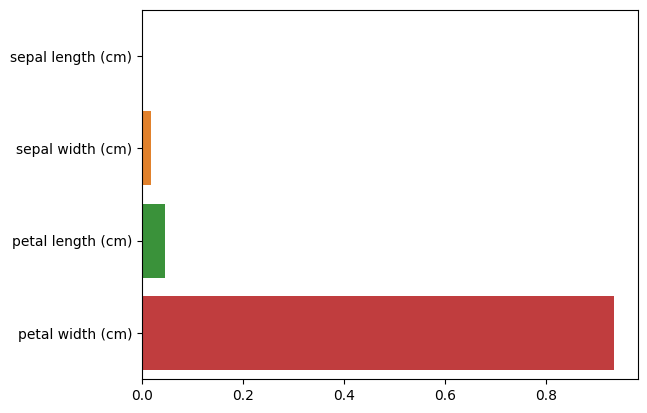

In [35]:
sns.barplot(x=dtc.feature_importances_,y=iris.feature_names)
plt.show()


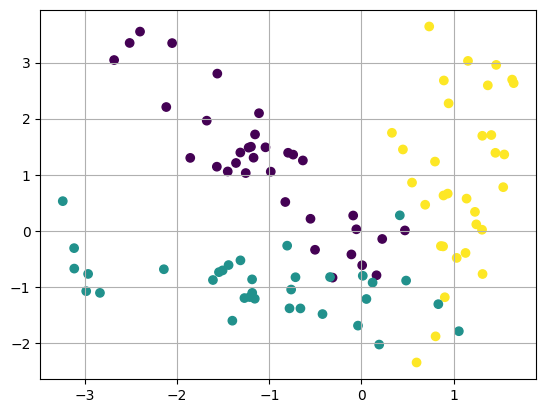

In [48]:
x_features, y_labels = make_classification(n_features=2,
                                           n_redundant=0,
                                           n_informative=2,
                                           n_classes=3,
                                           n_clusters_per_class=1)
plt.scatter(x_features[:,0],x_features[:,1],c=y_labels)
plt.grid()
plt.show()


In [56]:
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    model.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                                np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


<ipython-input-56-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


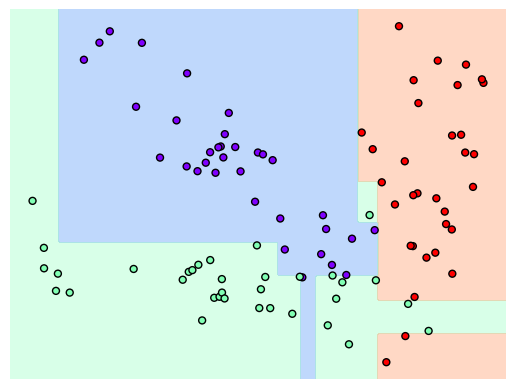

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(x_features, y_labels)
visualize_boundary(dtc,x_features, y_labels)


<ipython-input-56-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


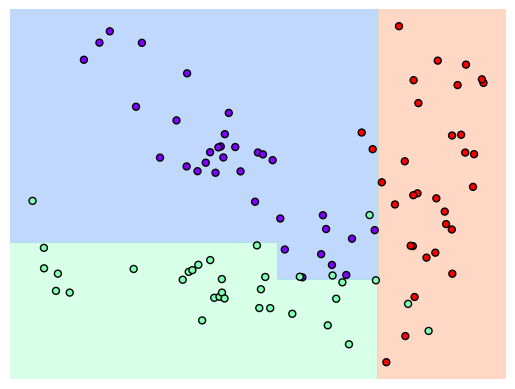

In [67]:
dtc = DecisionTreeClassifier(min_samples_leaf=6)
dtc.fit(x_features, y_labels)
visualize_boundary(dtc,x_features, y_labels)
